[Accueil](../../../index.ipynb) > [Sommaire](../../index.ipynb) > [6.4 Programmation dynamique](index.ipynb)

# Programmation dynamique

<figure style="float:right">
    <img src="img/Richard_Ernest_Bellman.jpg"
         alt="Richard Bellman"
         title="Richard Bellman"
         style="border:1px solid black"
         >
    <figcaption>Richard Bellman</figcaption>
</figure>


La **programmation dynamique** est à la fois une méthode d'**optimisation mathématique** et une méthode de **développement informatique**. Cette méthode a été inventée par Richard Bellman dans les années 50 et est utilisée dans de nombreux domaines ( Aerospatiale, Economie, Medecine...)
La programmation dynamique consiste toujours à résoudre un problème en se basant sur **plusieurs sous-problèmes** et ce de manière **récursive**.

Si des sous problèmes sont inclus récursivement dans de plus grands problèmes, donc que la méthode de la programmation dynamique s'applique, alors il existe une relation entre le grand problème et les valeurs des sous-problèmes. Cette relation se nomme l'**équation de Bellman**.

## Histoire

Dans les années 50, **Richard Bellman** utilise le terme de *dynamic programming* pour décrire la façon de résoudre des problèmes en utilisant un ensemble de solutions successives optimales.

Richard Bellman est né en 1920 à New York. Après des études de mathématiques, il est embauché à Los Alamos pour travailler sur le projet Manhattan. Après guerre il travaille chez [RAND Corporation](https://en.wikipedia.org/wiki/RAND_corporation), période pendant laquelle il développe la méthode de la programmation dynamique.

Bellman explique le choix de "programmation dynamique" en ces termes:

<cite>The 1950s were not good years for mathematical research. We had a very interesting gentleman in Washington named Wilson. He was Secretary of Defense, and he actually had a pathological fear and hatred of the word "research". I’m not using the term lightly; I’m using it precisely. His face would suffuse, he would turn red, and he would get violent if people used the term research in his presence. You can imagine how he felt, then, about the term mathematical. The RAND Corporation was employed by the Air Force, and the Air Force had Wilson as its boss, essentially. Hence, I felt I had to do something to shield Wilson and the Air Force from the fact that I was really doing mathematics inside the RAND Corporation. What title, what name, could I choose? In the first place I was interested in planning, in decision making, in thinking. But planning, is not a good word for various reasons. I decided therefore to use the word "programming". I wanted to get across the idea that this was dynamic, this was multistage, this was time-varying. I thought, let's kill two birds with one stone. Let's take a word that has an absolutely precise meaning, namely dynamic, in the classical physical sense. It also has a very interesting property as an adjective, and that is it's impossible to use the word dynamic in a pejorative sense. Try thinking of some combination that will possibly give it a pejorative meaning. It's impossible. Thus, I thought dynamic programming was a good name. It was something not even a Congressman could object to. So I used it as an umbrella for my activities.</cite>

Plus tard il s'intéresse à la biologie et à la médecine. En 1973 on lui diagnostique une tumeur au cerveau. Après l'ablation est handicapé mais cela ne l'empêche pas d'ajouter de nombreux articles scientifiques à son oeuvre prolifique.

Plusieurs algorithmes et équations portent son nom:

- L'équation de [Hamilton-Jacobi-Bellman](https://en.wikipedia.org/wiki/Hamilton%E2%80%93Jacobi%E2%80%93Bellman_equation).
- L'algorithme de [Bellman-Ford](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm)

Richard Bellman est décédé en 1984 en Californie à l'age de 63 ans.

sources [Wikipedia](https://en.wikipedia.org/wiki/Richard_Bellman)

## Un exemple simple : la suite de Fibonacci

Nous allons illustrer la programmation dynmaique sur le calcul de la suite de Fibonnaci qui s'exprime de cette façon :

$
\left\{
\begin{array}{ll}
U_0=0\\
U_1=1\\
U_n=U_{n-1}+U_{n-2}
\end{array}
\right.
$

<div class="alert alert-info">

La programmation dynamique, à l'instar de la méthode *diviser pour régner*, résoud les problèmes en **combinant les solutions des sous-problèmes**. Cependant, dans le *diviser pour régner*, les sous-problèmes sont **indépendants** du problème. Dans la programmation dynamique, il **existe une dépendance** entre les problèmes et les sous-problémes.
    
</div>


L'algorithme suivant est inéfficace car on doit résoudre plusieurs fois le même problème:

```
fonction fibonacci(n)
   si n = 0 ou n = 1
         retourner n
   sinon
         retourner fibonacci(n-1) + fibonacci(n-2)
```

Voici ci-dessous le graphe de dépendance du calcul de $U_{5}$. Ce graphe n'est pas un arbre, cela illustre que les **sous problèmes se chevauchent**.

Nous avions déjà étudié ce problème lors de notre [découverte de la récursivité](../../5_langages_programmation/Recursivite/recursivite.ipynb#Fibonacci)

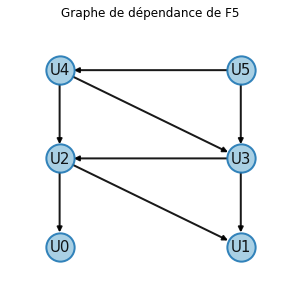

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

options = {
    "font_size": 15,
    "node_size": 800,
    "node_color": "#A0CBE2",
    "edgecolors": "tab:blue",
    "alpha": 0.9,
    "linewidths": 2,
    "width": 2,
}

G = nx.DiGraph(name = "Graphe de dépendance de F5")
G.add_node(5, pos=(1,2))
G.add_node(4, pos=(0,2))
G.add_node(3, pos=(1,1))
G.add_node(2, pos=(0,1))
G.add_node(1, pos=(1,0))
G.add_node(0, pos=(0,0))
G.add_edges_from([(5, 4), (5, 3), (4, 3), (4, 2), (3, 2), (3, 1), (2, 1) , (2, 0)])
labeldict = {}
labeldict[5] = "U5"
labeldict[4] = "U4"
labeldict[3] = "U3"
labeldict[2] = "U2"
labeldict[1] = "U1"
labeldict[0] = "U0"
pos=nx.get_node_attributes(G,'pos')

plt.figure(figsize=(5,5))
ax = plt.gca()
ax.margins(0.20)
ax.set_title('Graphe de dépendance de F5')

nx.draw(G,pos, labels=labeldict, with_labels = True, **options)


La programmation dynamique consiste à **stocker les valeurs des sous-problèmes** afin d'éviter la redondance des calculs, on appelle cette technique la **mémoïsation**.

Deux méthodes s'offrent à nous:

1. La méthode ascendante
2. La méthode descendante

### Méthode ascendante

Cette méthode consiste à calculer les problèmes les plus petits puis, de proche en proche, on calcule le problème global. Il s'agit ici d'un **algorithme itératif**.

In [23]:
def fibonacci(n):
    memo = {}
    memo[0] = 0
    memo[1] = 1
    for i in range(2,n+1):
        memo[i] = memo[i-1] + memo[i-2]
    return memo[n]

fibonacci(20)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

### Méthode descendante

Dans la méthode descendante, on écrit un **algorithme récursif** en utilisant la mémoïsation afin de ne pas calculer plusieurs fois le même problème.

Voici l'algorithme en pseudo-code:

```
fonction fibonacci(n)
   si F[n] n'est pas défini
      si n = 0 ou n = 1
         F[n] := n
      sinon
         F[n] := fibonacci(n-1) + fibonacci(n-2)
   retourner F[n]
```
Implémenter cet alogorithme en Python

In [26]:
def fibonacci(n, memo = None):
    if memo is None:
        memo = {0:0, 1:1}
    if memo.get(n, None) is None:
        memo[n] = fibonacci(n-1, memo) + fibonacci(n-2, memo)

    print(memo)
    return memo[n]

fibonacci(20)   

{0: 0, 1: 1}
{0: 0, 1: 1}
{0: 0, 1: 1, 2: 1}
{0: 0, 1: 1, 2: 1}
{0: 0, 1: 1, 2: 1, 3: 2}
{0: 0, 1: 1, 2: 1, 3: 2}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34, 10: 55}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34, 10: 55}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34, 10: 55, 11: 89}
{0: 0, 1: 1, 2: 1, 3: 2, 4: 3, 5: 5, 6: 8, 7: 13, 8: 21, 9: 34, 10: 55, 11: 89}
{0: 0, 1: 1, 2: 1,

6765

**Exercice**:

- Vérifier qu'on peut calculer de grands rangs dans la suite;
- A la vue du nombre d'appels récursifs, vérifier que la complexité temporelle T peut s'exprimer sous $T(n)=\Theta(n)=n$, c'est à dire que la **complexité temporelle est linéaire**.

## Application 1 : [TP rendu de monnaie](tp1.ipynb)

## Application 2 : [TP optimisation de chemins](tp2.ipynb)